In [1]:
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
dir(iris)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data[:, 2:4]) ## I am taking only petal length and petal width
df

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [9]:
df = df.rename(columns = {0: 'length'})
df = df.rename(columns = {1: 'width'})
df

,length,width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [14]:
scalar = MinMaxScaler()
df['length'] = scalar.fit_transform(df[['length']])
df


,length,width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [13]:
df['width'] = scalar.fit_transform(df[['width']])
df

,length,width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


Text(0, 0.5, 'width')

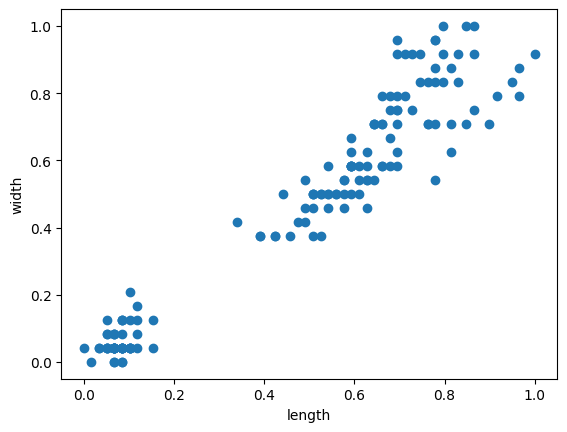

In [16]:
plt.scatter(df.length, df.width)
plt.xlabel('length')
plt.ylabel('width')

In [19]:
km = KMeans(n_clusters=2)
df['cluster']= km.fit_predict(df)
df

c:\Users\subra\.conda\envs\TensorFlow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,length,width,cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


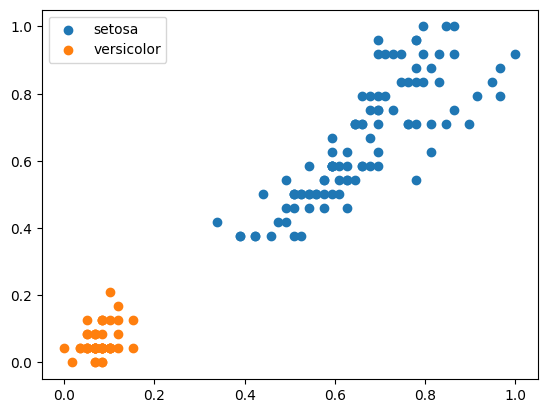

In [24]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]

plt.scatter(df0['length'], df0['width'], label = 'setosa')
plt.scatter(df1['length'], df1['width'], label = 'versicolor')
plt.legend()

In [25]:
km.cluster_centers_

array([[6.62033898e-01, 6.56666667e-01, 3.88578059e-16],
       [7.83050847e-02, 6.08333333e-02, 1.00000000e+00]])

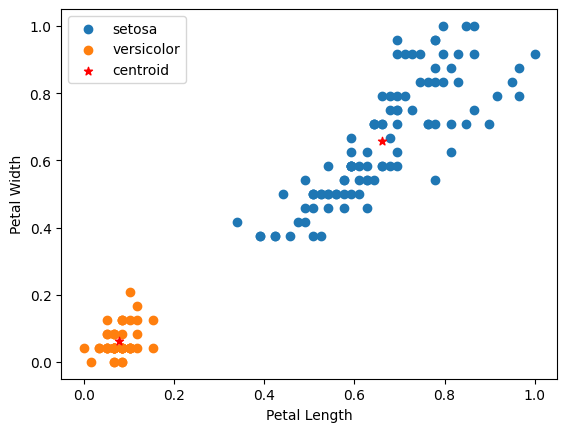

In [27]:

plt.scatter(df0['length'], df0['width'], label = 'setosa')
plt.scatter(df1['length'], df1['width'], label = 'versicolor')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color= 'red', marker='*', label ='centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

Elbow Plot

In [29]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['length', 'width']])
    sse.append(km.inertia_)

sse

c:\Users\subra\.conda\envs\TensorFlow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\subra\.conda\envs\TensorFlow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\subra\.conda\envs\TensorFlow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\subra\.conda\envs\TensorFlow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\U

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1588792731667128,
 0.8538617353912239,
 0.6801035704886195,
 0.5658013138564928,
 0.48580845539143697,
 0.4139407465373422]

Text(0, 0.5, 'SSE')

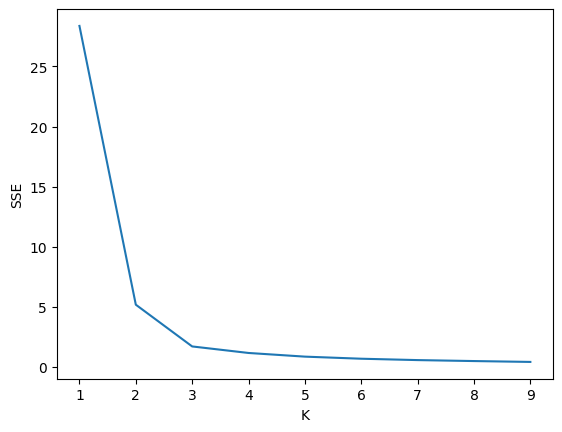

In [31]:
plt.plot(k_rng, sse)

plt.xlabel('K')
plt.ylabel('SSE')